In [1]:
import pandas as pd
import matplotlib.pyplot as plt


We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [4]:
complaints = pd.read_csv('../data/311-service-requests.csv',
                         parse_dates=['Created Date','Closed Date'], 
                         index_col='Created Date')

/home/zaid/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
complaints.head()

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2013-10-31 02:01:04,26593698,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2013-10-31 02:00:24,26594139,2013-10-31 02:40:32,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
2013-10-31 01:56:23,26595721,2013-10-31 02:21:48,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
2013-10-31 01:53:44,26590930,NaT,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [6]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111069 entries, 2013-10-31 02:08:41 to 2013-10-04 00:00:10
Data columns (total 51 columns):
Unique Key                        111069 non-null int64
Closed Date                       60270 non-null datetime64[ns]
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      102247 non-null object
Ci

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.

For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.

# 2.1 What's even in it? (the summary)

When you print a large dataframe, it will only show you the first few rows.

If you don't see this, don't panic! The default behavior for large dataframes changed between pandas 0.12 and 0.13. Previous to 0.13 it would show you a summary of the dataframe. This includes all the columns, and how many non-null values there are in each column.

In [3]:
complaints.head()

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2013-10-31 02:01:04,26593698,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2013-10-31 02:00:24,26594139,2013-10-31 02:40:32,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
2013-10-31 01:56:23,26595721,2013-10-31 02:21:48,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
2013-10-31 01:53:44,26590930,NaT,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [6]:
complaints.dropna(axis=1,inplace=True)

In [14]:
complaints

,Unique Key,Agency,Agency Name,Complaint Type,Status,Community Board,Borough,Park Facility Name,Park Borough,School Name,School Phone Number,School Address,School City,School State,School Zip
Created Date,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NYPD,New York City Police Department,Noise - Street/Sidewalk,Assigned,12 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 02:01:04,26593698,NYPD,New York City Police Department,Illegal Parking,Open,05 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 02:00:24,26594139,NYPD,New York City Police Department,Noise - Commercial,Closed,12 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:56:23,26595721,NYPD,New York City Police Department,Noise - Vehicle,Closed,07 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:53:44,26590930,DOHMH,Department of Health and Mental Hygiene,Rodent,Pending,10 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:46:52,26592370,NYPD,New York City Police Department,Noise - Commercial,Open,03 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:46:40,26595682,NYPD,New York City Police Department,Blocked Driveway,Assigned,10 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:44:19,26595195,NYPD,New York City Police Department,Noise - Commercial,Closed,10 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:44:14,26590540,NYPD,New York City Police Department,Noise - Commercial,Closed,04 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified


In [8]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111069 entries, 2013-10-31 02:08:41 to 2013-10-04 00:00:10
Data columns (total 15 columns):
Unique Key             111069 non-null int64
Agency                 111069 non-null object
Agency Name            111069 non-null object
Complaint Type         111069 non-null object
Status                 111069 non-null object
Community Board        111069 non-null object
Borough                111069 non-null object
Park Facility Name     111069 non-null object
Park Borough           111069 non-null object
School Name            111069 non-null object
School Phone Number    111069 non-null object
School Address         111069 non-null object
School City            111069 non-null object
School State           111069 non-null object
School Zip             111069 non-null object
dtypes: int64(1), object(14)
memory usage: 13.6+ MB


# 2.2 Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [9]:
complaints['Complaint Type']   #series

Created Date
2013-10-31 02:08:41     Noise - Street/Sidewalk
2013-10-31 02:01:04             Illegal Parking
2013-10-31 02:00:24          Noise - Commercial
2013-10-31 01:56:23             Noise - Vehicle
2013-10-31 01:53:44                      Rodent
2013-10-31 01:46:52          Noise - Commercial
2013-10-31 01:46:40            Blocked Driveway
2013-10-31 01:44:19          Noise - Commercial
2013-10-31 01:44:14          Noise - Commercial
2013-10-31 01:34:41          Noise - Commercial
2013-10-31 01:25:12    Noise - House of Worship
2013-10-31 01:24:14          Noise - Commercial
2013-10-31 01:20:57             Illegal Parking
2013-10-31 01:20:13             Noise - Vehicle
2013-10-31 01:19:54                      Rodent
2013-10-31 01:14:02    Noise - House of Worship
2013-10-31 00:54:03     Noise - Street/Sidewalk
2013-10-31 00:52:46             Illegal Parking
2013-10-31 00:51:00      Street Light Condition
2013-10-31 00:46:27          Noise - Commercial
2013-10-31 00:43:47    Nois

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

In [7]:
complaints[:10]

,Unique Key,Agency,Agency Name,Complaint Type,Status,Community Board,Borough,Park Facility Name,Park Borough,School Name,School Phone Number,School Address,School City,School State,School Zip
Created Date,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NYPD,New York City Police Department,Noise - Street/Sidewalk,Assigned,12 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 02:01:04,26593698,NYPD,New York City Police Department,Illegal Parking,Open,05 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 02:00:24,26594139,NYPD,New York City Police Department,Noise - Commercial,Closed,12 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:56:23,26595721,NYPD,New York City Police Department,Noise - Vehicle,Closed,07 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:53:44,26590930,DOHMH,Department of Health and Mental Hygiene,Rodent,Pending,10 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:46:52,26592370,NYPD,New York City Police Department,Noise - Commercial,Open,03 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:46:40,26595682,NYPD,New York City Police Department,Blocked Driveway,Assigned,10 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:44:19,26595195,NYPD,New York City Police Department,Noise - Commercial,Closed,10 QUEENS,QUEENS,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2013-10-31 01:44:14,26590540,NYPD,New York City Police Department,Noise - Commercial,Closed,04 MANHATTAN,MANHATTAN,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified


We can combine these to get the first 5 rows of a column:

In [7]:
complaints['Complaint Type'].head()

Created Date
2013-10-31 02:08:41    Noise - Street/Sidewalk
2013-10-31 02:01:04            Illegal Parking
2013-10-31 02:00:24         Noise - Commercial
2013-10-31 01:56:23            Noise - Vehicle
2013-10-31 01:53:44                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [8]:
complaints[:5]['Complaint Type']

Created Date
2013-10-31 02:08:41    Noise - Street/Sidewalk
2013-10-31 02:01:04            Illegal Parking
2013-10-31 02:00:24         Noise - Commercial
2013-10-31 01:56:23            Noise - Vehicle
2013-10-31 01:53:44                     Rodent
Name: Complaint Type, dtype: object

In [17]:
complaints.iloc[100] # row index

Unique Key                                    26594657
Agency                                            NYPD
Agency Name            New York City Police Department
Complaint Type                        Blocked Driveway
Status                                            Open
Community Board                            15 BROOKLYN
Borough                                       BROOKLYN
Park Facility Name                         Unspecified
Park Borough                                  BROOKLYN
School Name                                Unspecified
School Phone Number                        Unspecified
School Address                             Unspecified
School City                                Unspecified
School State                               Unspecified
School Zip                                 Unspecified
Name: 2013-10-30 23:31:51, dtype: object

# 2.3 Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [9]:
#complaints[['Complaint Type', 'Borough']]

cols =['Complaint Type', 'Descriptor','Borough']
complaints[cols].head(2)

,Complaint Type,Descriptor,Borough
Created Date,,,
2013-10-31 02:08:41,Noise - Street/Sidewalk,Loud Talking,QUEENS
2013-10-31 02:01:04,Illegal Parking,Commercial Overnight Parking,QUEENS


That showed us a summary, and then we can look at the first 10 rows:

In [10]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
Created Date,,
2013-10-31 02:08:41,Noise - Street/Sidewalk,QUEENS
2013-10-31 02:01:04,Illegal Parking,QUEENS
2013-10-31 02:00:24,Noise - Commercial,MANHATTAN
2013-10-31 01:56:23,Noise - Vehicle,MANHATTAN
2013-10-31 01:53:44,Rodent,MANHATTAN
2013-10-31 01:46:52,Noise - Commercial,QUEENS
2013-10-31 01:46:40,Blocked Driveway,QUEENS
2013-10-31 01:44:19,Noise - Commercial,QUEENS
2013-10-31 01:44:14,Noise - Commercial,MANHATTAN


# 2.4 What's the most common complaint type?

This is a really easy question to answer! There's a `.value_counts()` method that we can use:

In [9]:
complaints['Borough'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

If we just wanted the top 10 most common complaints, we can do this:

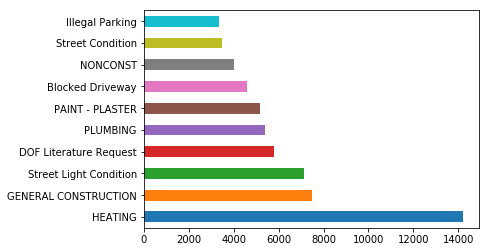

In [20]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts.head(10).plot(kind='barh')
plt.show()

But it gets better! We can plot them!

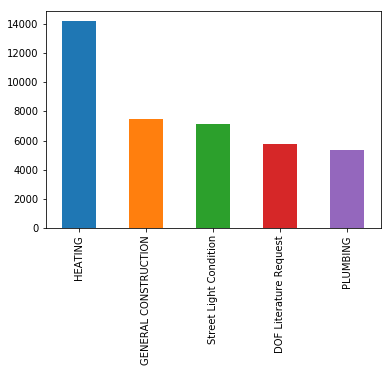

In [13]:
complaint_counts.head().plot(kind='bar')

In [17]:
is_cons = complaints['Complaint Type'] == 'GENERAL CONSTRUCTION'

In [18]:
is_cons

Created Date
2013-10-31 02:08:41    False
2013-10-31 02:01:04    False
2013-10-31 02:00:24    False
2013-10-31 01:56:23    False
2013-10-31 01:53:44    False
2013-10-31 01:46:52    False
2013-10-31 01:46:40    False
2013-10-31 01:44:19    False
2013-10-31 01:44:14    False
2013-10-31 01:34:41    False
2013-10-31 01:25:12    False
2013-10-31 01:24:14    False
2013-10-31 01:20:57    False
2013-10-31 01:20:13    False
2013-10-31 01:19:54    False
2013-10-31 01:14:02    False
2013-10-31 00:54:03    False
2013-10-31 00:52:46    False
2013-10-31 00:51:00    False
2013-10-31 00:46:27    False
2013-10-31 00:43:47    False
2013-10-31 00:41:17    False
2013-10-31 00:39:55    False
2013-10-31 00:38:00    False
2013-10-31 00:37:16    False
2013-10-31 00:35:18    False
2013-10-31 00:33:00    False
2013-10-31 00:32:44    False
2013-10-31 00:32:08    False
2013-10-31 00:32:00    False
                       ...  
2013-10-04 00:17:03    False
2013-10-04 00:16:22    False
2013-10-04 00:16:00    False
2

In [21]:
complaints[is_cons]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111069 entries, 2013-10-31 02:08:41 to 2013-10-04 00:00:10
Data columns (total 51 columns):
Unique Key                        111069 non-null int64
Closed Date                       60270 non-null datetime64[ns]
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      102247 non-null object
Ci

In [18]:
complaints.head()

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2013-10-31 02:01:04,26593698,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2013-10-31 02:00:24,26594139,2013-10-31 02:40:32,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
2013-10-31 01:56:23,26595721,2013-10-31 02:21:48,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
2013-10-31 01:53:44,26590930,NaT,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  

In [88]:
mdf = complaints[['Borough','Latitude','Longitude']].copy()
mdf.dropna(inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98143 entries, 2013-10-31 02:08:41 to 2013-10-04 00:00:10
Data columns (total 3 columns):
Borough      98143 non-null object
Latitude     98143 non-null float64
Longitude    98143 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.0+ MB


In [90]:
def color_code(item):
    if item == 'BROOKLYN':return 1
    if item == 'MANHATTAN':return 2
    if item == 'QUEENS':return 3
    if item == 'Unspecified':return 4
    if item == 'BRONX':return 5
    return 0

In [91]:
mdf.loc[:,'colors'] = mdf['Borough'].apply(color_code)
mdf.head()

,Borough,Latitude,Longitude,colors
Created Date,,,,
2013-10-31 02:08:41,QUEENS,40.708275,-73.791604,3
2013-10-31 02:01:04,QUEENS,40.721041,-73.909453,3
2013-10-31 02:00:24,MANHATTAN,40.843330,-73.939144,2
2013-10-31 01:56:23,MANHATTAN,40.778009,-73.980213,2
2013-10-31 01:53:44,MANHATTAN,40.807691,-73.947387,2


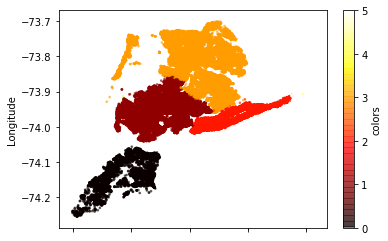

In [99]:
mdf.plot.scatter(x ='Latitude',
                 y='Longitude',
                 s=3,
                 alpha=0.5,
                 c='colors',
                 colormap='hot')